In [126]:
import pandas as pd
import numpy as np

In [129]:
df = pd.read_csv('placement.csv')

In [130]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [131]:
# Steps
# 1. Preprocess + EDA + Feature Selection
# 2. Extract input and output cols
# 3. Scale the values
# 4. Train test split
# 5. Train the model
# 6. Evaluate the model
# 7. Deployment

In [132]:
df= df.iloc[:,1:]

In [133]:
df.shape

(100, 3)

In [134]:
df.dtypes

cgpa         float64
iq           float64
placement      int64
dtype: object

In [135]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [136]:
import matplotlib.pyplot as plt

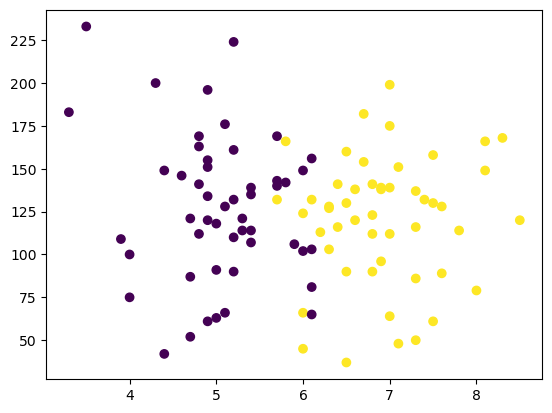

In [138]:
plt.scatter(df['cgpa'], df['iq'],c=df['placement'])
plt.show()

In [139]:
X=df.iloc[:,0:2]
y= df.iloc[:,-1]

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
scaler= StandardScaler()

In [142]:
X= scaler.fit_transform(X)

In [143]:
X

array([[ 0.71095807, -0.01459341],
       [-0.0799718 , -0.44233119],
       [-0.60725838, -0.0649155 ],
       [ 1.23824465,  0.21185601],
       [-0.16785289,  0.46346647],
       [ 0.97460136, -1.90167186],
       [-0.25573399,  0.48862751],
       [-0.87090167, -1.52425617],
       [ 0.0957904 ,  0.81572111],
       [-0.78302057, -1.44877303],
       [ 0.0079093 , -1.977155  ],
       [ 0.79883917,  0.36282228],
       [-0.51937728,  0.38798333],
       [ 0.35943369, -0.19072073],
       [ 0.0957904 , -0.51781433],
       [-0.78302057,  1.31894203],
       [-0.69513948,  2.52667224],
       [-2.36488031,  1.49506935],
       [-1.74971264, -0.59329747],
       [-0.69513948,  0.21185601],
       [ 0.53519588, -0.09007654],
       [ 0.97460136,  0.68991588],
       [-0.95878277, -0.09007654],
       [-1.13454496, -0.92039106],
       [-1.13454496, -0.0649155 ],
       [-0.87090167, -0.81974688],
       [ 0.88672027,  1.89764609],
       [ 0.0079093 ,  0.01056764],
       [-0.69513948,

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
clf = LogisticRegression()

In [148]:
clf.fit(X_train,y_train)

LogisticRegression()

In [151]:
y_pred=clf.predict(X_test)

In [150]:
y_test

83    1
53    1
70    1
45    1
44    1
39    0
22    0
80    0
10    1
0     1
18    0
30    1
73    0
33    0
90    1
4     0
76    0
77    1
12    0
31    0
55    1
88    0
26    1
42    1
69    1
15    0
40    0
96    0
9     0
72    1
Name: placement, dtype: int64

In [152]:
from sklearn.metrics import accuracy_score

In [153]:
accuracy_score(y_pred,y_test)

0.9

In [155]:
!pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00


In [156]:
# Decision boundary after accuracy check
from mlxtend.plotting import plot_decision_regions

<Axes: >

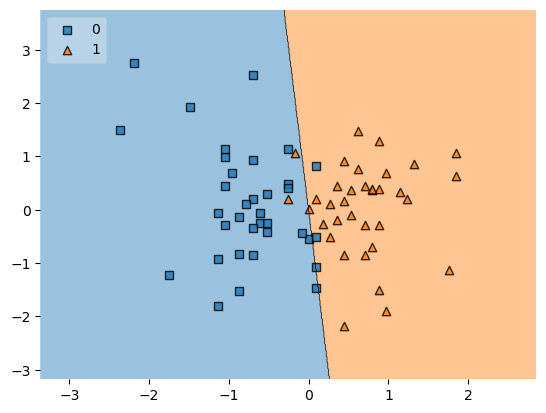

In [157]:
plot_decision_regions(X_train,y_train.values, clf=clf,legend=2)

In [158]:
import pickle

In [160]:
pickle.dump(clf,open('model.pkl','wb'))